<a href="https://colab.research.google.com/github/PurvanshBarodia/Demo1/blob/main/folder1/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting features from data

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import numpy as np
import plotly.express as px
import pandas as pd


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=3fcd9697f7b80caab79c53a9a78a31d383e3e8e6e9ab83d1e1e02b13899c657d
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
# Esperanto Vs Portugeas

topic1 = 'Giraffe Animal'
topic2 = 'Elephant Animal'
wikipedia.set_lang('es') 
esp1 = wikipedia.page(topic1).content
esp2 = wikipedia.page(topic2).content
wikipedia.set_lang('pt')
pt1 = wikipedia.page(topic1).content
pt2 = wikipedia.page(topic2).content

In [ ]:
esp1

'La Jirafa reticulada (Giraffa reticulata), más conocida comúnmente como jirafa borracha, es una subespecie de jirafa nativa de Somalia, norte de Kenia y sur de Etiopía. Con base en estudios genéticos algunos la consideran una especie.[1]\u200b Las jirafas reticuladas pueden cruzarse con otras subespecies de jirafa en cautiverio o si entran en contacto con poblaciones de otras subespecies en la naturaleza.\nLa jirafa reticulada es una de las más conocidas subespecies de jirafa, y junto con la jirafa de Rothschild es, con mucho, la jirafa más comúnmente vista en zoológicos.[2]\u200b Su pelaje está formado por grandes manchas poligoninales de color hígado descritos por una red de líneas blancas brillantes. En bloques a veces puede aparecer de color rojo oscuro y también puede cubrir las piernas. La extraordinaria altura de las jirafas se atribuye a un ritual conocido como "estrangulamiento" en el que dos machos luchan por los derechos de reproducción al estrellar sus cuellos entre sí. La

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
esp1 = cleanup(esp1)
esp2 = cleanup(esp2)
pt1 = cleanup(pt1)
pt2 = cleanup(pt2)


In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

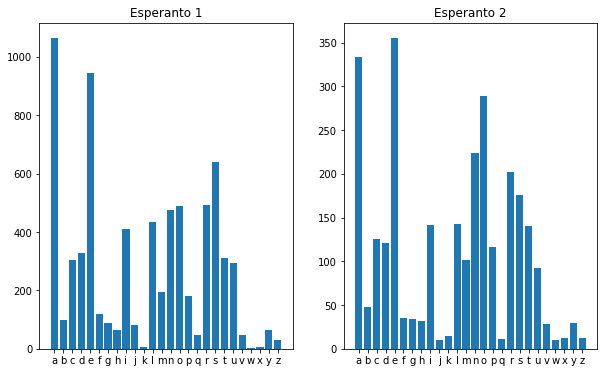

In [ ]:
# Let's Compare unigram of  diffrent topic within same lang
# to see it is a better option to distingvish between two topics or not.
plt.figure(figsize=(10,6))
unigram_esp1 = Counter(ngrams(esp1,1))
plt.subplot(1,2,1)
plothistogram(unigram_esp1)
plt.title('Esperanto 1')
plt.subplot(1,2,2)
unigram_esp2 = Counter(ngrams(esp2,1))
plothistogram(unigram_esp2)
plt.title('Esperanto 2')
plt.show()

In [ ]:
# Now Same thing for portugease


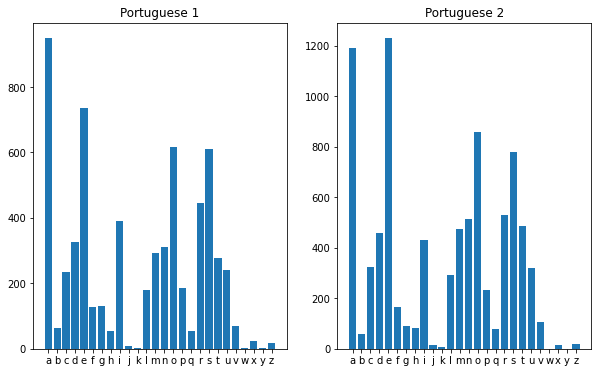

In [ ]:
plt.figure(figsize=(10,6))
unigram_pt1 = Counter(ngrams(pt1,1))
plt.subplot(1,2,1)
plothistogram(unigram_pt1)
plt.title('Portuguese 1')
plt.subplot(1,2,2)
unigram_pt2 = Counter(ngrams(pt2,1))
plothistogram(unigram_pt2)
plt.title('Portuguese 2')
plt.show()

In [ ]:
# As we can see for both lang unigram for diffrent topics looks similar. So it is not a good feature for that.
#### It can might be because of we have taken similar type of data. (we will decide same thing for diffrent type of data in section2)

# Now try to do thia for same topic and diffrent lang

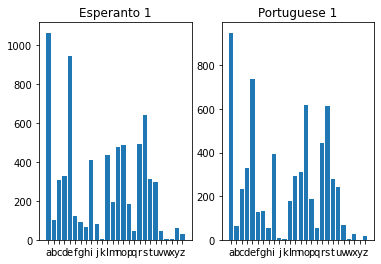

In [ ]:
# For Topic 1

unigram_esp1 = Counter(ngrams(esp1,1))
plt.subplot(1,2,1)
plothistogram(unigram_esp1)
plt.title('Esperanto 1')
plt.subplot(1,2,2)
unigram_pt1 = Counter(ngrams(pt1,1))
plothistogram(unigram_pt1)
plt.title('Portuguese 1')
plt.show()

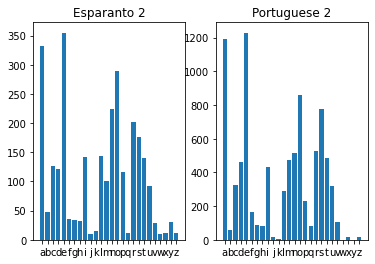

In [ ]:
# For Topic 2
unigram_esp2 = Counter(ngrams(esp2,1))
plt.subplot(1,2,1)
plothistogram(unigram_esp2)
plt.title('Esparanto 2')
plt.subplot(1,2,2)
unigram_pt2 = Counter(ngrams(pt2,1))
plothistogram(unigram_pt2)
plt.title('Portuguese 2')
plt.show()


In [ ]:
# Above Four graphs tells we will fail to distinguish between two language for same topic, if we use unigram as our feature.

Results based on comperission done between two topics and three lang tells unibin is not a good feature either in deciding language or a topic.

The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

In [ ]:
# Let's take
topic1 = 'Stock Market'           # Here we have taken very different topics
topic2 = 'Electronic Circuit'     # Let's see whather it gave same conclusion as above or suggest something different
wikipedia.set_lang('es') 
esp1 = wikipedia.page(topic1).content
esp2 = wikipedia.page(topic2).content
wikipedia.set_lang('pt')
pt1 = wikipedia.page(topic1).content
pt2 = wikipedia.page(topic2).content

In [ ]:
esp1 = cleanup(esp1)
esp2 = cleanup(esp2)
pt1 = cleanup(pt1)
pt2 = cleanup(pt2)

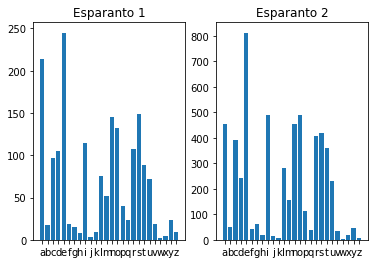

In [ ]:
# Let's Compare unigram of  diffrent topic within same lang
# to see it is a better option to distingvish between two topics

unigram_esp1 = Counter(ngrams(esp1,1))
plt.subplot(1,2,1)
plothistogram(unigram_esp1)
plt.title('Esparanto 1')
plt.subplot(1,2,2)
unigram_esp2 = Counter(ngrams(esp2,1))
plothistogram(unigram_esp2)
plt.title('Esparanto 2')
plt.show()

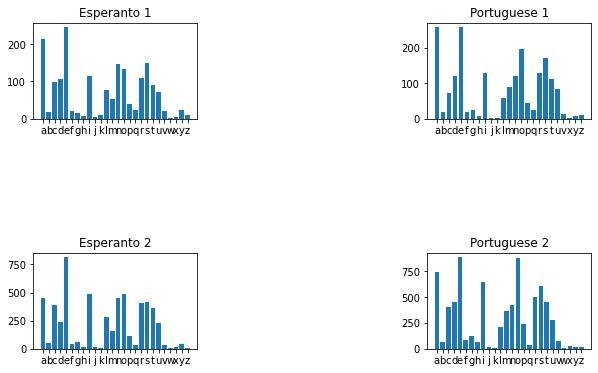

In [ ]:
plt.figure(figsize=(10,6))
unigram_esp1 = Counter(ngrams(esp1,1))
plt.subplot(3,3,1)
plothistogram(unigram_esp1)
plt.title('Esperanto 1')
plt.subplot(3,3,3)
unigram_pt1 = Counter(ngrams(pt1,1))
plothistogram(unigram_pt1)
plt.title('Portuguese 1')
plt.subplot(3,3,7)
unigram_esp2 = Counter(ngrams(esp2,1))
plothistogram(unigram_esp2)
plt.title('Esperanto 2')
plt.subplot(3,3,9)
unigram_pt2 = Counter(ngrams(pt2,1))
plothistogram(unigram_pt2)
plt.title('Portuguese 2')
plt.show()

However we have choosen very diffrent topic we came at conclusion same as before that to distinguish try to use other than unigram.

Let's Do it for Bigram

In [ ]:
bigram_esp1 = Counter(ngrams(esp1,2)) # bigrams

bigram_esp2 = Counter(ngrams(esp2,2))

bigram_pt1 = Counter(ngrams(pt1,2))

bigram_pt2 = Counter(ngrams(pt2,2))

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

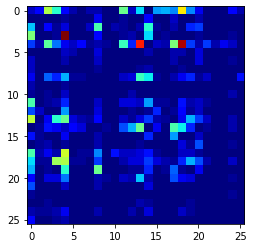

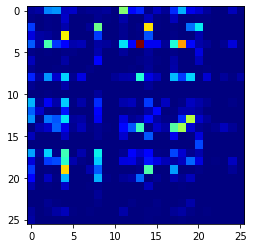

In [ ]:
biesp1 = plotbihistogram(bigram_esp1)
plt.show()
biesp2 = plotbihistogram(bigram_esp2)

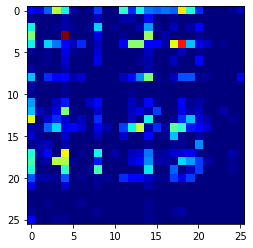

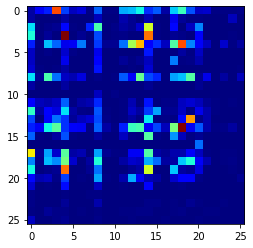

In [ ]:

bipt1 = plotbihistogram(bigram_pt1)
plt.show()
bipt2 = plotbihistogram(bigram_pt2)

However topics are not of same type. we can see similarity in bigrams.

It is giving same result as before that  the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics as bigrams are similar across different topics but different across languages.

In [ ]:
# Trigrams
trigram_esp1 = Counter(ngrams(esp1,3)) # bigrams

trigram_esp2 = Counter(ngrams(esp2,3))

trigram_pt1 = Counter(ngrams(pt1,3))

trigram_pt2 = Counter(ngrams(pt2,3))

In [ ]:
def plottrihistogram(ngram):
  freqx = np.zeros(26)
  freqy = np.zeros(26)
  freqz = np.zeros(26)

  for ii in range(26):
        freqx[ii] = ngram[(chr(ord('a')+ii))]
  
  for jj in range(26):
        freqy[jj] = ngram[(chr(ord('a')+jj))]
                           
  for kk in range(26):
        freqz[kk] = ngram[(chr(ord('a')+kk))]
  
  return (freqx,freqy,freqz)

In [ ]:
"""x1, y1, z1 = plottrihistogram(trigram_esp1)
plt. contour(x1, y1, z1, 20, cmap='RdGy');
plt.show()"""

"x1, y1, z1 = plottrihistogram(trigram_esp1)\nplt. contour(x1, y1, z1, 20, cmap='RdGy');\nplt.show()"

In [ ]:
 """triesp1 = plottrihistogram(trigram_esp1)
plt.show()
triesp2 = plottrihistogram(trigram_esp2)"""

'triesp1 = plottrihistogram(trigram_esp1)\nplt.show()\ntriesp2 = plottrihistogram(trigram_esp2)'

In [ ]:
x1,y1,z1 = 

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      for kk in range(26):
        freq[ii,jj,kk] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj), chr(ord('a')+kk))]
  return freq

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Which is the best combination of features?

In [ ]:
# Let's plot scatter plot for combination of each features
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.title("Sum Vs Hull")
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.title("Sum Vs Hole")
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.title("Hole Vs Bondary")
plt.show()

# Hull and boundary
plt.scatter(bound0,hull0, alpha=0.1)
plt.scatter(bound1,hull1, alpha=0.1)
plt.xlabel("Boundary")
plt.ylabel("Hull")
plt.legend(['0','1'])
plt.title("Hull Vs Boundary")
plt.show()


# Sum and boundary
plt.scatter(sum0,bound0,alpha=0.1)
plt.scatter(sum1,bound1,alpha=0.1)
plt.xlabel("Sum")
plt.ylabel("Boundary")
plt.legend(['0','1'])
plt.title("Sum Vs Boundary")
plt.show()

Sum and Hole are best combination of features.

How would you test or visualize four or more features?

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)

df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)), np.concatenate((hull0, hull1)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class','Size'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', size='Size', opacity=0.1)
fig.show()

4. Will these features work for different classes other than 0 and 1?